#  Flipkart Reviews Sentiment Analysis using Python



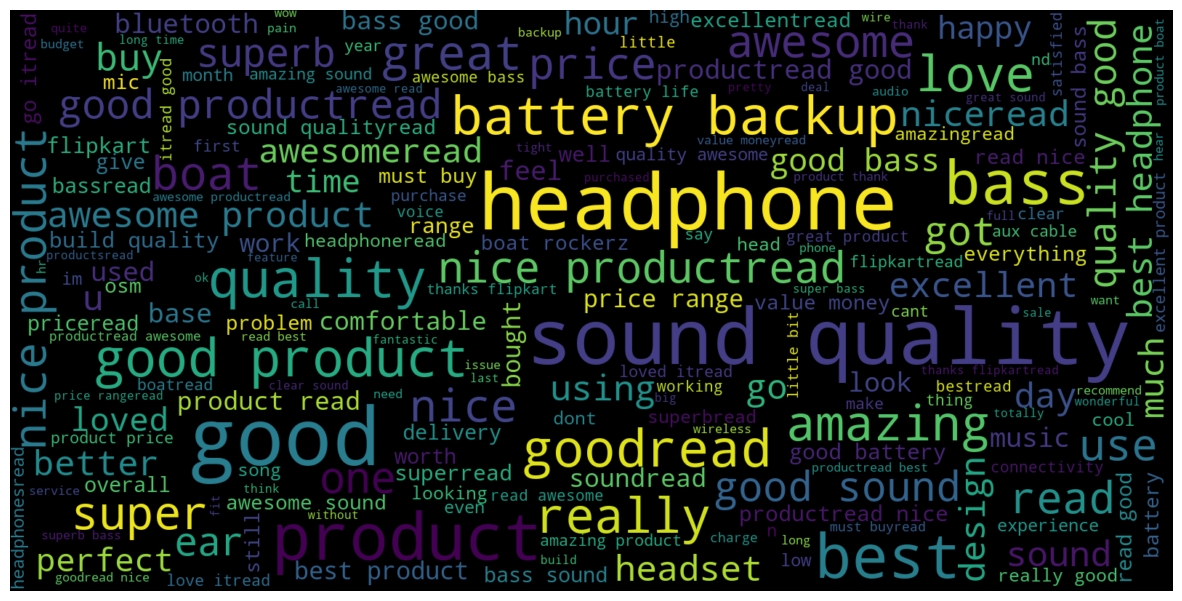

In [1]:
# Importing Libraries and Datasets
# The libraries used are : 

# Pandas : For importing the dataset.
# Scikit-learn : For importing the model, accuracy module, and TfidfVectorizer.
# Warning : To ignore all the warnings
# Matplotlib : To plot the visualization. Also used Wordcloud for that.
# Seaborn : For data visualization.

The Natural Language Toolkit (NLTK) is a platform used for building programs for text analysis. One of the more powerful aspects of the NLTK module is the Part of Speech tagging.
In order to run the below python program you must have to install NLTK.

Removing stop words with NLTK in Python
Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
data = pd.read_csv('d:flipkart_data.csv')


In [9]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


# Preprocessing and cleaning the reviews 
As, the real data is multi-labelled, so firstly explore those labels then we will convert them into 2 classes.

In [10]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

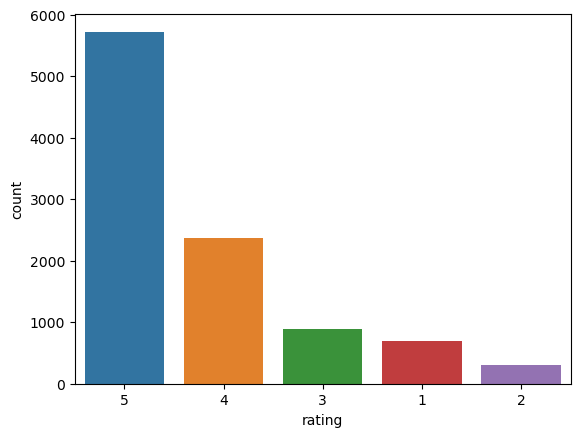

In [11]:
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1s category. For that the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1). For better understanding, refer the code below.

In [12]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)
  
data['label'] = pos_neg

Let’s create the function to preprocess the dataset 



In [13]:
from tqdm import tqdm
  
  
    def preprocess_text(text_data):
        preprocessed_text = []

        for sentence in tqdm(text_data):
            # Removing punctuations
            sentence = re.sub(r'[^\w\s]', '', sentence)

            # Converting lowercase and removing stopwords
            preprocessed_text.append(' '.join(token.lower()
                                              for token in nltk.word_tokenize(sentence)
                                              if token.lower() not in stopwords.words('english')))

        return preprocessed_text

Now, we can implement this function for the dataset. The code for that is given below.



In [14]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:37<00:00, 265.02it/s]


In [15]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


# Analysis of the Dataset
Let’s check out that how many counts are there for positive and negative sentiments.

In [16]:
data["label"].value_counts()

1    5726
0    4250
Name: label, dtype: int64

To have the better picture of the importance of the words let’s create the Wordcloud of all the words with label = 1 i.e. positive

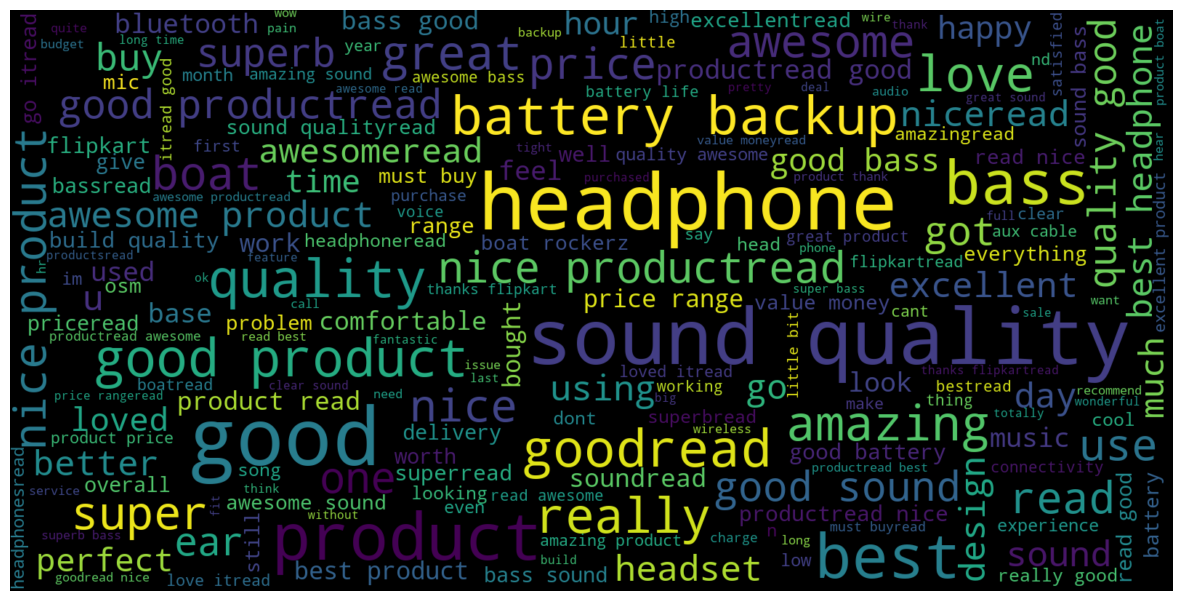

In [17]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# Let’s create the vectors.

Converting text into Vectors
TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). We will be implementing this with the code below.

In [18]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [19]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model training, Evaluation, and Prediction
Once analysis and vectorization is done. We can now explore any machine learning model to train the data. But before that perform the train-test split.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                                                    test_size=0.33,
                                                    stratify=data['label'],
                                                    random_state = 42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

  
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
  
#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9247344007182403


# Let’s see the confusion matrix for the results.



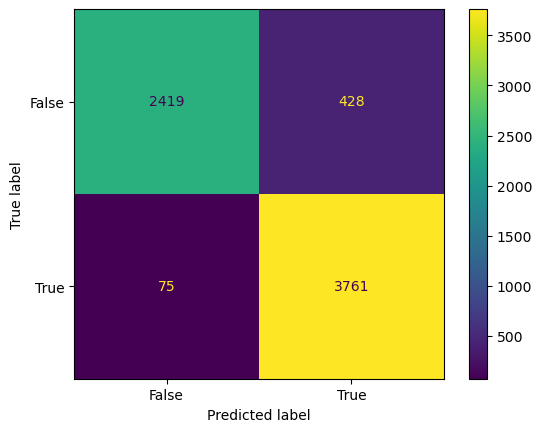

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,pred)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
  
cm_display.plot()
plt.show()

# Conclusion
Decision Tree Classifier is performing well with this data. In future, we can also work with large data by scraping it through the website.